Today's Dish:
## 1) Data Visualization (Matplotlib and Seaborn)
## 1.5) Some boring datascience stuff
## 2) Dimensionality Reduction


In [1]:
import matplotlib.pyplot as plt

In [40]:
import numpy as np
X = np.arange(-10, 10, 0.5)

In [41]:
f = lambda x: x**2 - 10
g = lambda x: x**3/10 -10
h = lambda x: np.sin(x)
y = f(X)
y_ = g(X)
y__ = h(X)

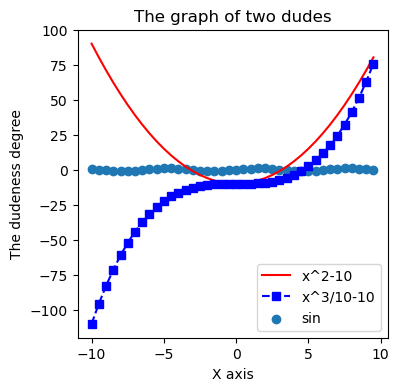

In [42]:
plt.figure(figsize = (4,4))
plt.plot(X, f(X), label = "x^2-10", color = "red")  ##We have interpolation between points
plt.plot(X, g(X), label = "x^3/10-10", color = "blue", marker='s', linestyle='dashed') ## Change the marker for better readability!!!!
plt.scatter(X, y__, label = "sin")
plt.title("The graph of two dudes")
plt.xlabel("X axis")
plt.ylabel("The dudeness degree")
#plt.ylim((-10,10))
#plt.xlim((-5,5))
plt.legend()
plt.savefig("figue.jpg")
plt.show()

<Figure size 640x480 with 0 Axes>

In [6]:
from sklearn.datasets import load_digits

In [45]:
X, y = load_digits()["images"], load_digits()["target"]

In [8]:
X[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [9]:
y[0]

0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


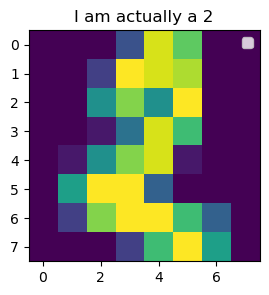

In [10]:
plt.figure(figsize=(3,3))
plt.title("I am actually a 2")
plt.imshow(X[2])
plt.legend()
plt.show()

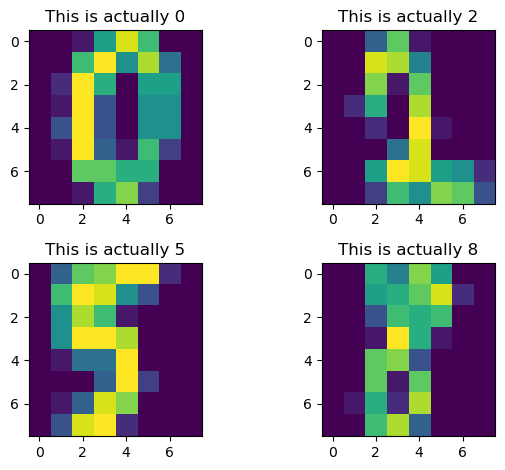

In [52]:
fig_, ax_ = plt.subplots(2,2)
for i in range(2):
    for j in range(2):
        ax_[i, j].imshow(X[(i+2)*(j+5)])
        ax_[i, j].set_title(f"This is actually {y[(i+2)*(j+5)]}")
plt.tight_layout()
plt.show()

In [51]:
X.shape

(1797, 8, 8)

## Dimensionality Reduction Methods
## 1) PCA
## 2) t-sne
# The idea is to project $$\mathbb{R}^{64} \to \mathbb{R}^4$$  or maybe a smaller dimension, actually compressing the information with as little loss as possible.

In [78]:
from sklearn.decomposition import PCA

In [79]:
pca = PCA(n_components=2)

In [80]:
x_reshaped = X.reshape(1797, 64)

In [81]:
x_2 = pca.fit_transform(x_reshaped)

In [61]:
x_2[0]

array([-1.25946723, 21.2748894 ])

In [63]:
classes = set(y)

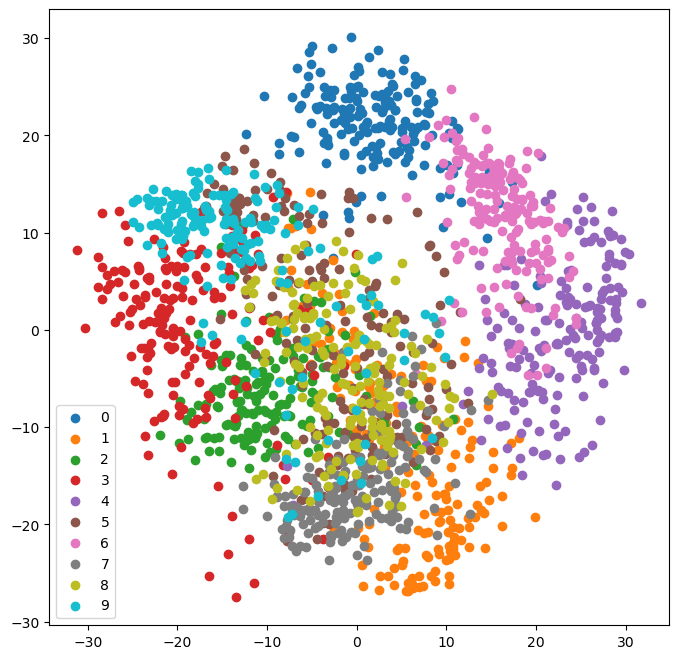

In [82]:
plt.figure(figsize=(8,8))
for cls_ in classes:
    plt.scatter(x_2[y == cls_, 0], x_2[y == cls_, 1], label = f"{cls_}")
plt.legend()
plt.show()

In [70]:
sum(pca.explained_variance_ratio_)

0.28509364823679195

In [83]:
from sklearn.manifold import TSNE

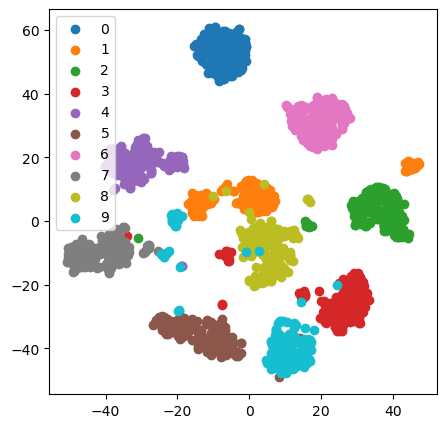

In [110]:
x_tsne = TSNE(2, n_jobs = -1, init = "random").fit_transform(x_reshaped)
plt.figure(figsize=(5,5))
for cls_ in classes:
    plt.scatter(x_tsne[y == cls_, 0], x_tsne[y == cls_, 1], label = f"{cls_}")
plt.legend()
plt.show()

In [76]:
import seaborn as sns

In [145]:
data = sns.load_dataset("iris")

In [120]:
X,y  = data.iloc[:, :-1], data.iloc[:, -1]

In [125]:
from sklearn.model_selection import train_test_split

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [138]:
pca = PCA(2)
X_train_ = pca.fit_transform(X_train)
X_test_ = pca.transform(X_test)

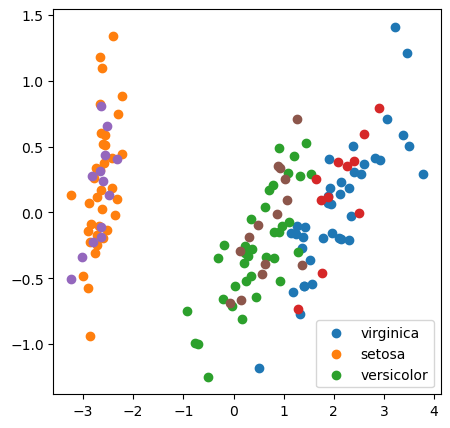

In [141]:
plt.figure(figsize=(5,5))
for cls_ in list(set(y)):
    plt.scatter(X_train_[y_train == cls_, 0], X_train_[y_train == cls_, 1], label = f"{cls_}")
for cls_ in list(set(y)):
    plt.scatter(X_test_[y_test == cls_, 0], X_test_[y_test == cls_, 1])
plt.legend()
plt.show()

<Axes: >

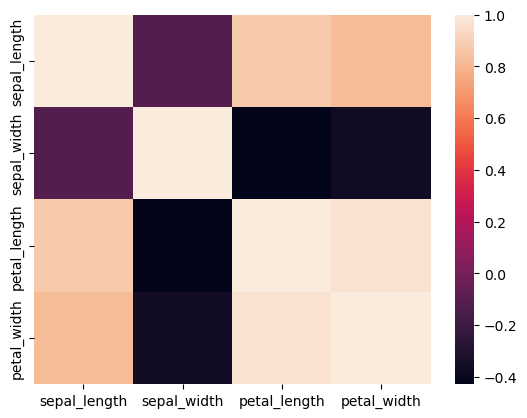

In [151]:
sns.heatmap(data.iloc[:, :-1].corr())

In [153]:
dataset_2 = sns.load_dataset("penguins")

In [154]:
dataset_2

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

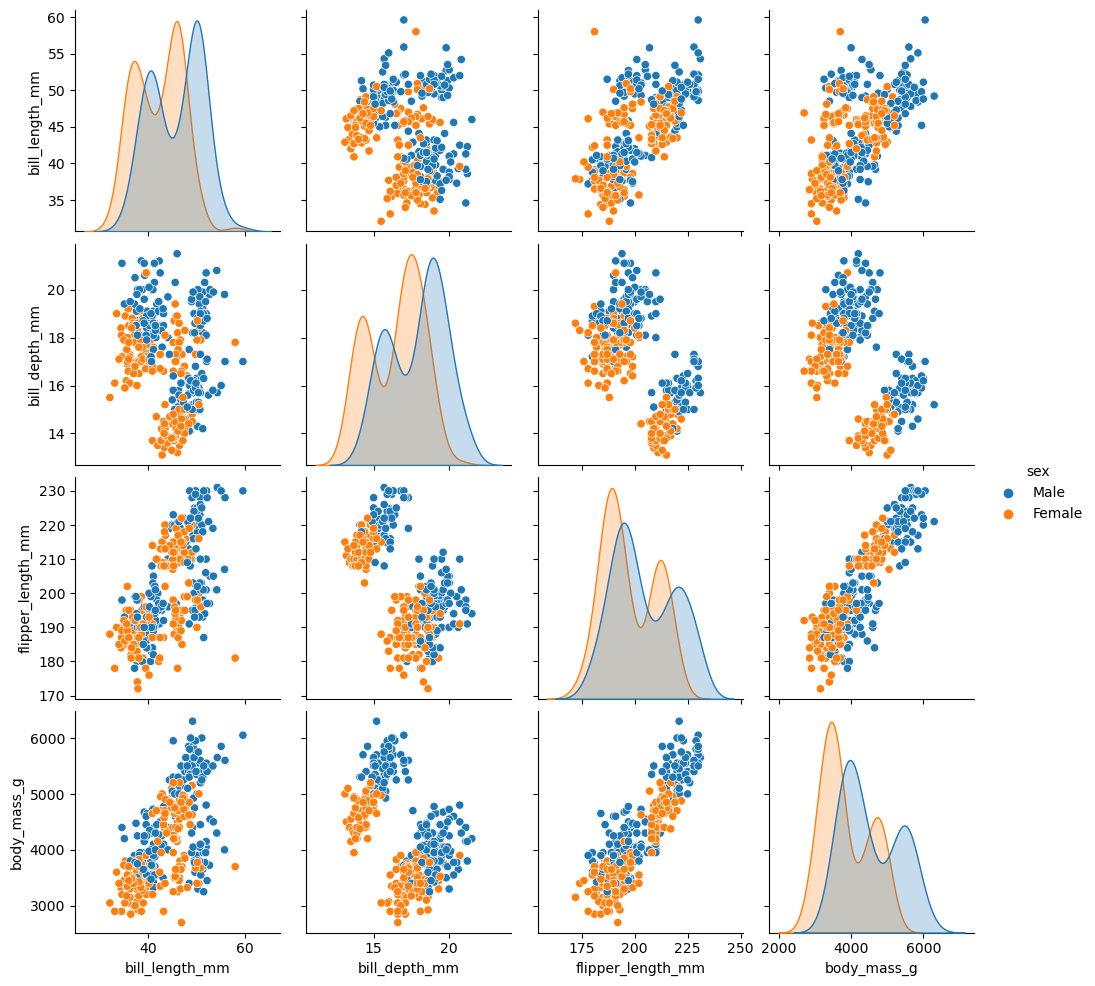

In [156]:
sns.pairplot(dataset_2, hue="sex")

In [157]:
dataset_2 = sns.load_dataset("tips")

In [158]:
dataset_2

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='day', ylabel='tip'>

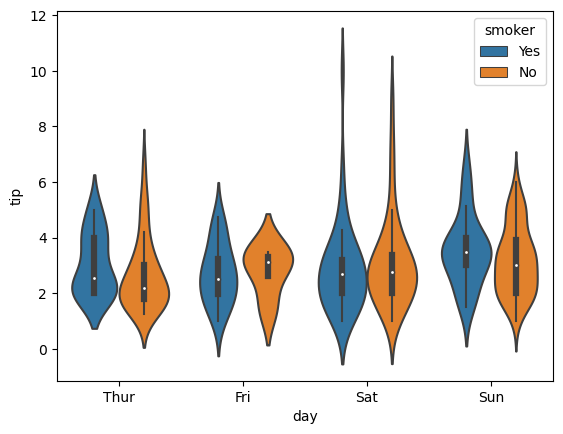

In [161]:
sns.violinplot(data = dataset_2, x = "day", y = "tip", hue = "smoker")